#Protein Structure Analysis

##Introduction
The secondary protein structure, i.e. set of shapes associated with certain amino acid sequences, is modeled based on the data provided by [ics.uci.edu](https://archive.ics.uci.edu/ml/datasets/Molecular+Biology+%28Protein+Secondary+Structure%29).
A total of 91 proteins, with variable sequence lengths,  made up of amino acids (20 types) are analyzed using a Long-Short Term Memory (LSTM) Recurrent Neural Net (RNN).The protein structure is made up of three shapes: helical (h), beta sheet(e), and random(r).

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pdb
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive


In [ ]:
#Input
dataset =pd.read_csv("MyDrive/MLData/protein-secondary-structure.train",
                     sep= " ",skiprows=range(7))
print('\n\n')
print(dataset.head(),'\n')




  <>
G  _
V  _
G  _
T  _
V  _ 



In [ ]:
fin = open("MyDrive/MLData/protein-secondary-structure.train","r")
aa  = []
sh  = []
nseq= 0
a_,s_ = [],[]

for iline in fin.readlines():
  if '#' not in iline and len(iline)>1:
    if '<>' in iline:
      #print("Start")
      a_ = []
      s_ = []

    elif 'end' in iline:
      nseq = nseq+1
      aa.append(a_)
      sh.append(s_)
      #print("End")

    else:
      x1,x2 = iline.split()
      a_.append(x1)
      s_.append(x2)

print (nseq, "sequences processed")

91 sequences processed


In [ ]:
len(sh)

91

**Sequence Length, and  Mean Sequence Size**

165.97802197802199

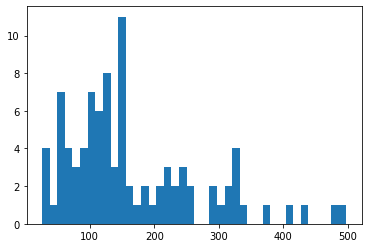

In [ ]:
seq_sizes =[]
for i in aa:
  seq_sizes.append(len(i))
plt.hist(seq_sizes,bins=40)
np.mean(seq_sizes)

In [ ]:
sh_all = ['r' if b=="_" else b for a in sh for b in a]
aa_all = [b for a in aa for b in a]

In [ ]:
unq_aa = set(aa_all)
unq_sh = set(sh_all)

In [ ]:
d_atoidx = {j : i for i,j in enumerate(unq_aa)}
d_stoidx = {j : i for i,j in enumerate(unq_sh)}
d_idxtoa = {i : j for i,j in enumerate(unq_aa)}
d_idxtos = {i : j for i,j in enumerate(unq_sh)}
d_stoidx['_'] = d_stoidx['r']


**Dictionary to convert Amino acids and Shapes to Numeric Variables**

In [ ]:
print(d_atoidx,d_stoidx)

{'N': 0, 'M': 1, 'H': 2, 'K': 3, 'S': 4, 'V': 5, 'Y': 6, 'A': 7, 'L': 8, 'G': 9, 'D': 10, 'F': 11, 'I': 12, 'W': 13, 'T': 14, 'P': 15, 'Q': 16, 'C': 17, 'R': 18, 'E': 19} {'e': 0, 'r': 1, 'h': 2, '_': 1}


In [ ]:
dataset = pd.DataFrame()
dataset["aminoacid"] = [d_atoidx[i] for i in aa_all]
dataset["secondary"] = [d_stoidx[i] for i in sh_all] 
#dataset = pd.DataFrame()
#dataset["aminoacid"] = aa_all
#dataset["secondary"] = sh_all 

**Convert to categorical variables**

In [ ]:
dataset2 = pd.get_dummies(dataset,columns=['aminoacid','secondary'])

**Correlations**

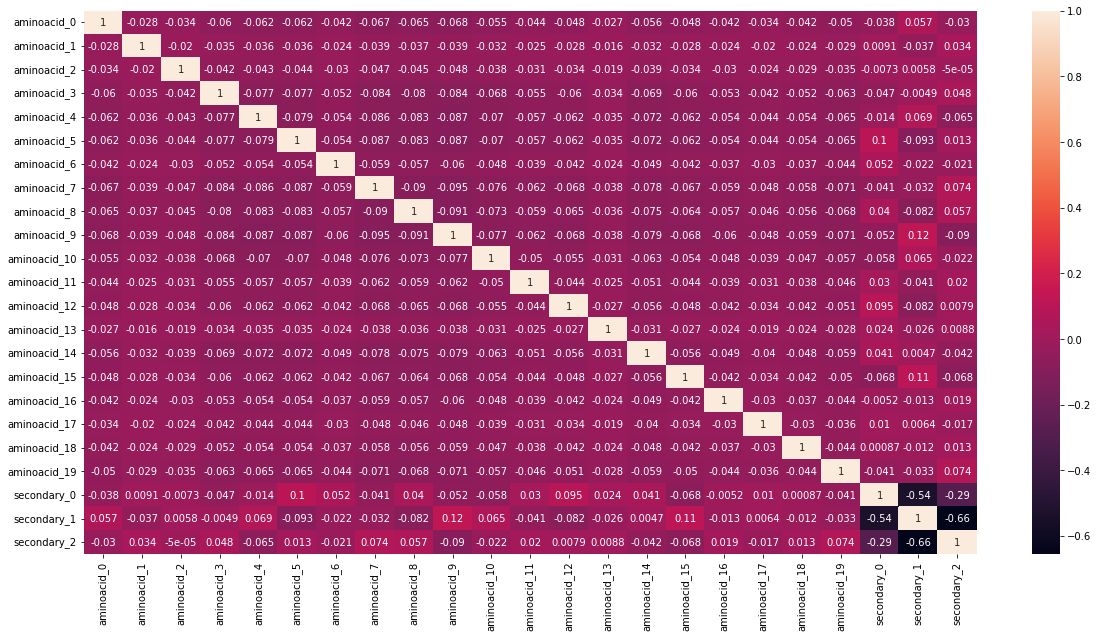

In [ ]:
corr = dataset2.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr,annot=True)

In [ ]:
#Create arrays from original sequences
sh_num = []
aa_num = []
sh_num2= []
aa_num2= []
max_seq= 500 # lARGEST SEQUENCE 
num_a, num_s = len(unq_aa), len(unq_sh)
total_sequences = len(sh)
for i in range(total_sequences):
  s_ = sh[i]
  a_ = aa[i]
  s2_= [d_stoidx[j] for j in s_]
  a2_= [d_atoidx[i] for i in a_]
  npad = max_seq-len(s2_)
  s22_= np.pad(s2_,(0,npad),constant_values=10)
  a22_= np.pad(a2_,(0,npad),constant_values=100)

  sh_num2.append(s22_)
  aa_num2.append(a22_)

  s3_= np.eye(num_s)[s2_]
  a3_= np.eye(num_a)[a2_]
  
  s4_ = np.pad(np.array(s3_),((0,npad,),(0,0)),constant_values=0)
  a4_ = np.pad(np.array(a3_),((0,npad,),(0,0)),constant_values=0)
  sh_num.append(s4_)
  aa_num.append(a4_)


In [ ]:
l1=[1,2,3,4]
l2= np.zeros(498).astype(bool)
n1 = np.eye(5)[l1]
n2= [5,6,7]
a1=np.pad(n2,(0,3),constant_values=0)
print(a1)

[5 6 7 0 0 0]


In [ ]:
sh_num = np.array(sh_num)
aa_num = np.array(aa_num)
sh_num2= np.array(sh_num2)
aa_num2= np.array(aa_num2)
print(type(sh_num))
print(sh_num.shape,aa_num.shape)

<class 'numpy.ndarray'>
(91, 500, 3) (91, 500, 20)


In [ ]:
#Splitting Dataset
x = aa_num
y = sh_num
from sklearn.model_selection import train_test_split
x_train, x_test, y_train,y_test = \
  train_test_split(x,y,test_size=0.2,random_state=0)

x2 = aa_num2
y2 = sh_num2
x_train2, x_test2, y_train2,y_test2 = \
  train_test_split(x2,y2,test_size=0.2,random_state=0)


**X -> (nProteins,sequence_length,nAmino_Acids)**,
**Y -> (nProteins,sequence_length,nShapes)**

In [ ]:
print("X shape:",x.shape,'\n',
      "Y shape ",y.shape,"\n",
      "Train Samples: ", len(x_train),'\n',
      "Test Samples: ",len(x_test),'\n'
      )

X shape: (91, 500, 20) 
 Y shape  (91, 500, 3) 
 Train Samples:  72 
 Test Samples:  19 



### Models
####RandomForest Classifier

In [ ]:
#Metrics
from sklearn.metrics import accuracy_score,\
  confusion_matrix, f1_score, precision_score,recall_score, mean_squared_error
#Random Forest Model
from sklearn.ensemble import RandomForestClassifier
class_rm = RandomForestClassifier(random_state=0)
class_rm.fit(x_train2,y_train2)
y_pred = class_rm.predict(x_test2)
mse    = mean_squared_error(y_test2,y_pred)
#cm     = confusion_matrix(y_test2,y_pred)
#acc  = accuracy_score (y_test2,y_pred)
# f1   = f1_score       (y_test,y_pred)
#prec = precision_score(y_test,y_pred)
#rec  = recall_score   (y_test,y_pred)

In [ ]:
mse

1.8443157894736844

####Multi-Output RandomForest Classifier

In [ ]:
from sklearn.datasets import make_classification
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils import shuffle


n_samples, n_features = x_train2.shape # 10,100
n_outputs = y_train2.shape[1] 
n_classes = 3
forest = RandomForestClassifier(random_state=1)
multi_target_forest = MultiOutputClassifier(forest, n_jobs=-1)
clfit = multi_target_forest.fit(x_train2, y_train2)

In [ ]:
clfit

MultiOutputClassifier(estimator=RandomForestClassifier(random_state=1),
                      n_jobs=-1)

In [ ]:
ypred = clfit.predict(x_test2)
mse   = mean_squared_error(ypred,y_test2)
print('mse',mse)

mse 1.1043157894736841


####CNN
**Test CNN model. Not used in the final result.**

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dropout, BatchNormalization, Conv1D
from tensorflow.keras.layers import Dense, Flatten
import tensorflow as tf
from tensorflow.keras import optimizers

In [ ]:
pss_rand = np.random.rand(20,200)

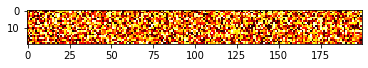

In [ ]:
plt.imshow(pss_rand, cmap='hot', interpolation='nearest')
plt.show()

In [ ]:
cnn_width = 17

LR        = 0.0009 # maybe after some (10-15) epochs reduce it to 0.0008-0.0007
drop_out  = 0.38
batch_dim = 64

loss = 'categorical_crossentropy'

m = Sequential()
m.add(Conv1D(128, 5, padding='same', activation='relu', input_shape=(500, 20)))
m.add(BatchNormalization())
m.add(Dropout(drop_out))
m.add(Conv1D(128, 3, padding='same', activation='relu'))
m.add(BatchNormalization())
m.add(Dropout(drop_out))
m.add(Conv1D(64, 3, padding='same', activation='relu'))
m.add(BatchNormalization())
m.add(Dropout(drop_out))
m.add(Flatten())
m.add(Dense(128, activation='relu'))
m.add(Dense(32, activation='relu'))
m.add(Dense(3, activation = 'softmax'))
opt = optimizers.Adam(lr=LR)
m.compile(optimizer=opt,
          loss=loss,
          metrics=['accuracy', 'mae'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
m.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
m.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 500, 128)          12928     
                                                                 
 batch_normalization (BatchN  (None, 500, 128)         512       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 500, 128)          0         
                                                                 
 conv1d_1 (Conv1D)           (None, 500, 128)          49280     
                                                                 
 batch_normalization_1 (Batc  (None, 500, 128)         512       
 hNormalization)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 500, 128)          0

In [ ]:
# train_dataset = tf.data.Dataset.from_tensor_slices((
#                 x_train,y_train[:,0,:])).batch(64)
# test_dataset  = tf.data.Dataset.from_tensor_slices((
#                 x_test,y_test[:,0,:])).batch(64)
# history_train = m.fit(train_dataset,epochs=5,
#                          validation_data=test_dataset)

#### RNN
Applying LSTM to protein sequences.

In [ ]:
from tensorflow.keras import Sequential, Input, Model
from tensorflow.keras.layers import Dropout, BatchNormalization, Conv1D
from tensorflow.keras.layers import Dense, Flatten, Reshape
from tensorflow.keras.layers import LSTM
import tensorflow as tf
from tensorflow.keras import optimizers
from tensorflow.keras.optimizers import Adam

#### Create sequences
Create smaller sequences to be processed by lstm model. Large sequences (>100) take long time to process, since each time-step contains one element of the sequence.

In [ ]:
def create_smaller_sequence2(x,y, out_length=50,max_pos=500):
    ## array [num_protein,num_aa/shape,type_aa/shape]
    ## Convert entire sequence into smaller sequence, and remove padding
    nseq   = len(x)
    assert(len(x)==len(y))

    x_ = []
    y_ = []

    n_lists      = int(max_pos/out_length)
    total_subseq = 0
    for ip in range(nseq):
    #loop over proteins
        n_subseq = 0
        for il in range(n_lists):
            isq1     = il*out_length
            isq2     = il*out_length+out_length
            seq_x    = x[ip,isq1:isq2]
            seq_y    = y[ip,isq1:isq2]
            if np.any(seq_x[0]):
                x_.append(seq_x)
                y_.append(seq_y)
                n_subseq += 1

        total_subseq += n_subseq
        #print ('Seq', ip, 'sub seq',n_subseq,'Total',total_subseq)

    x_ = np.array(x_)
    y_ = np.array(y_)
    print ('Output Seq',ip," Shape",x_.shape)

    return (x_,y_)

####LSTM
LSTM with 3D tensor -> (nprotein,sequence_length,namino), 
requires writing a custom model which passes each data slice to the LSTM_Cell (see djmodel).

####Hyperparameters

In [ ]:
#LSTM
#hidden state 'a' size
n_a         = 128
n_values_aa = 20
n_values_sh = 3
Tx          = 100
nepochs     = 25
reshaper    = Reshape((1,n_values_aa))
LSTM_cell   = LSTM(n_a, return_state=True)
densor      = Dense(n_values_sh, activation='softmax')

In [ ]:
#Train Test Datasets
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(\
                                aa_num,sh_num, test_size=0.2,random_state=0)

x_train, y_train = create_smaller_sequence2(train_X,train_y,out_length=Tx)
x_test , y_test  = create_smaller_sequence2(test_X , test_y,out_length=Tx)
x_all  , y_all   = create_smaller_sequence2(aa_num, sh_num,out_length=Tx)


sh_shape = y_train.shape
y_train  = y_train.reshape(sh_shape[1],sh_shape[0],sh_shape[2])
sh_shape = y_test.shape
y_test   = y_test.reshape(sh_shape[1],sh_shape[0],sh_shape[2])
sh_shape = y_all.shape
y_all    = y_all.reshape(sh_shape[1],sh_shape[0],sh_shape[2])


X = x_all
Y = y_all

print("X shape:",X.shape,'\n',
      "Y shape ",Y.shape,"\n",
      )

Output Seq 71  Shape (163, 100, 20)
Output Seq 18  Shape (38, 100, 20)
Output Seq 90  Shape (201, 100, 20)
X shape: (201, 100, 20) 
 Y shape  (100, 201, 3) 



**Model= Input + HiddenState + Forward Pass**

In [ ]:
## create model= inputs + forward pass + model def
def djmodel(Tx, LSTM_cell,densor,reshaper):
    n_values = densor.units
    n_a      = LSTM_cell.units
    #Input Layer
    X        = Input(shape=(Tx,n_values_aa))
    #Hidden State
    a0       = Input(shape=(n_a,),name='a0')
    c0       = Input(shape=(n_a,),name='c0')
    a        = a0
    c        = c0

    #Forward pass
    outputs  = []
    for t in range(Tx):
        x = X[:, t, :]
        x = reshaper(x) # x(n_vals)-> x(1,n_vals)

        a, _, c = LSTM_cell(inputs=x, initial_state=[a,c])
        out     = densor(a)
        outputs.append(out) #outputs collected here

    model = Model(inputs=[X, a0, c0], outputs=outputs)

    return model



model = djmodel (Tx=Tx, LSTM_cell=LSTM_cell, densor=densor, reshaper=reshaper)
##model.summary()

In [ ]:
#optimizer
opt = Adam(learning_rate=0.01, beta_1=0.9, beta_2=0.999, decay=0.01)
model.compile(optimizer=opt, loss='categorical_crossentropy',
                metrics=['accuracy',])

#initialize hidden state
m   = len(X) #number of training examples 
a0  = np.zeros((m,n_a))
c0  = np.zeros((m,n_a))

#train the model
history = model.fit([X,a0,c0],list(Y), epochs=nepochs,verbose=0,
                    validation_split=0.2
                )

loss    = history.history['loss']

####Plotting loss

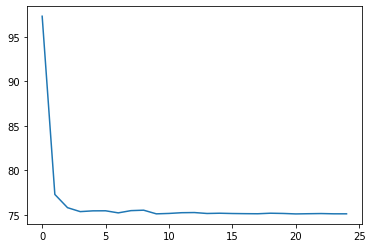

In [ ]:
import matplotlib.pyplot as plt
plt.plot(range(nepochs),loss)

##Conclusions

A complex LSTM model is applied to protein sequences to predict the secondary structure. Based on the cumulative loss, the model optimizes within few epochs and then stabilizes. We do not calculate the accuracy of this model at this stage, as we cannot decide the appropriate accuracy metric.